# Préambule


In [1]:
import numpy as np
import math
import os
import matplotlib.pyplot as plt

dossier = os.getcwd()

# Données pour la simulation

## Paramètres

In [2]:
temps_simu = 72 #temps en heures
pas_de_temps = 10 # pas de temps des entrées et sorties en minutes
nb_pdt = int(temps_simu*60/pas_de_temps)

## Constantes

In [3]:
Rho = 1000 # kg/m3
Cp = 4180 # J/(kg.K)

## Caractéristiques de la centrale de production

In [4]:
E_geo = 0.95
eta_gaz = 0.85

## Entrées de la simulation

In [5]:
"Débit en entrée"
M_res_nom = 10  # kg/s       "Débit nominal
#option 1 : débit constant
M_res = np.ones(nb_pdt)*M_res_nom*0.8

#option 2 : débit variable (variation sinusoïdale)
#Mres = [Mtub_nom*(5+3*math.sin(2*math.pi*t*10/(4*60)))/8 for t in range(nb_pdt)]

"Température extérieure "
#Evolution sinusoïdale de la température
Text = [5+5*math.sin(math.pi*t*10/(12*60)-math.pi/2) for t in range(nb_pdt)]

"Température de l'eau retour réseau primaire (entrée production)"
#Evolution sinusoïdale de la température
T_res_ret = [50+10*math.sin(math.pi*t*10/(12*60)-math.pi/2*1.2) for t in range(nb_pdt)]

T_res_dep= np.zeros(nb_pdt) # Température départ primaire


# Simulation

In [6]:
delta_t = 1 # pas de temps de calcul en minutes
nb_dt = int(pas_de_temps/delta_t)

## Initialisation

In [7]:
T_cons_prod = np.zeros(nb_pdt)
P_geo = np.zeros(nb_pdt)
P_gaz = np.zeros(nb_pdt)
P_gaz_reel = np.zeros(nb_pdt)
P_res_tot = np.zeros(nb_pdt)
T_cons_prod = np.zeros(nb_pdt)
T_geo_out = np.zeros(nb_pdt)

## Calcul de la consommation de gaz et énergie fournie

In [8]:
for t in range(nb_pdt-1):
    "Calcul de la température de consigne au départ primaire"
    T_cons_prod1 = -1.85 * Text[t] + 77 #loi de chauffe primaire
    if T_cons_prod1 < 60:
            T_cons_prod1 = 60
    else:
            T_cons_prod1 = -1.85 * Text[t] +77
    T_cons_prod[t] = T_cons_prod1
    
    "calcul de la température de sortie de l'échangeur géothermal"
    T_geo_out[t] = E_geo * ( 65 - T_res_ret[t] ) +T_res_ret[t] # Calcul de la température de sortie réseau de l'echangeur geothermie
    if T_geo_out[t] > T_cons_prod1:
        T_geo_out[t]= T_cons_prod1
        P_geo[t] = Cp * M_res[t] * (T_geo_out[t] - T_res_ret[t] ) # Calcul puissance geothermie
    else:
         P_geo[t] = Cp * M_res[t] * (T_geo_out[t] - T_res_ret[t]) # Calcul puissance geothermie
    
    "calcul de la puissance d'appoint gaz"
    P_gaz[t] = M_res[t] * Cp * (T_cons_prod[t] - T_geo_out[t]) # Calcul puissance chaudière gaz
    P_gaz_reel[t] = P_gaz[t] / eta_gaz # calcul puissance gaz réelle
    
    "puissance totale fournie au réseau"
    P_res_tot[t] = P_geo[t] + P_gaz[t]  # calcul puissance totale fournie au réseau
    
#sorties : P_geo, P_gaz_reel, P_res_tot, T_cons_prod, T_geo_out

# Sorties graphiques

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'c:\\Users\\bduplessis\\Documents\\GitHub\\DHC\\Modèles\\Résultats'

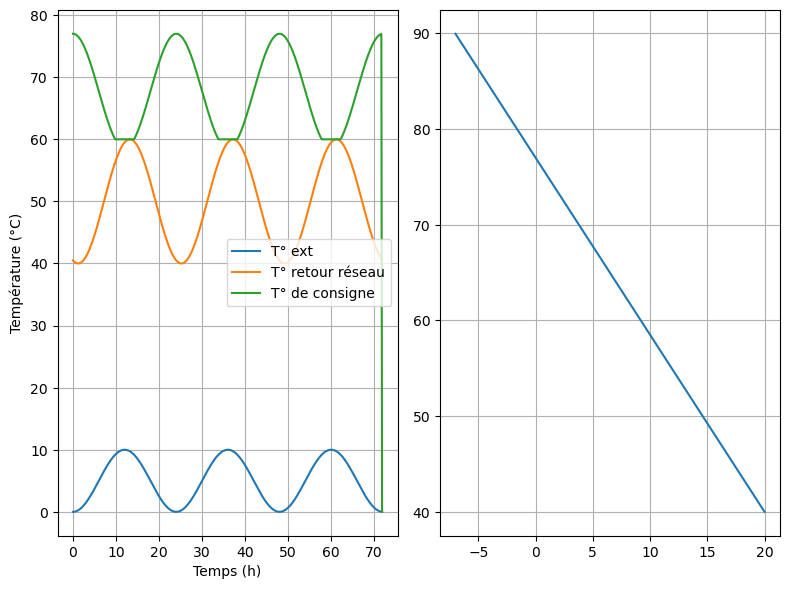

In [9]:
ax_t = np.arange(0,temps_simu,pas_de_temps/60)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,6))

axs[0].plot(ax_t, Text,label = 'T° ext')
axs[0].plot(ax_t, T_res_ret, label = 'T° retour réseau')
axs[0].plot(ax_t, T_cons_prod, label = 'T° de consigne')
axs[0].legend()
axs[0].set(xlabel='Temps (h)', ylabel='Température (°C)')
axs[0].grid()

Texterieur=np.linspace(-7, 20)
Tconsigne = -1.85 * Texterieur + 77
axs[1].plot(Texterieur, Tconsigne)
axs[1].grid()

fig.tight_layout()
fig.canvas.toolbar_position = 'right'

os.chdir(dossier+'\\Résultats')
fig.savefig("Test_production.png")
os.chdir(dossier)

plt.show()